In [11]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import os
import torch
from torch import nn
from torchvision import transforms as T

from model import StyleTransferModel

In [13]:
model_root_lst = ['model_ckps/23:03:32-[nlp-cls]-[100k-steps-s-w-1.0]',
'model_ckps/11:21:49-[nlp-cls]-[100k-steps-s-w-3.0]',
'model_ckps/11:22:41-[nlp-cls]-[100k-steps-s-w-5.0]',
'model_ckps/22:50:07-[nlp-cls]-[100k-steps-s-w-10.0]']
models = []
for model_root in model_root_lst:
    model_p = os.path.join(model_root, 'model.ckpt')
    model = StyleTransferModel(use_relu=True, style_loss_w=-1.0)
    ckp = torch.load(model_p)
    sd = {k.replace('model.', ''): v for k, v in ckp['state_dict'].items()}
    model.load_state_dict(sd)
    model.eval()
    models.append(model)


Using cache found in /home/dmt/.cache/torch/hub/pytorch_vision_v0.9.0


Using cache found in /home/dmt/.cache/torch/hub/pytorch_vision_v0.9.0
Using cache found in /home/dmt/.cache/torch/hub/pytorch_vision_v0.9.0
Using cache found in /home/dmt/.cache/torch/hub/pytorch_vision_v0.9.0


In [14]:
def denorm_img(img):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(img.device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(img.device)
    return img * std + mean

## Use Large Patch

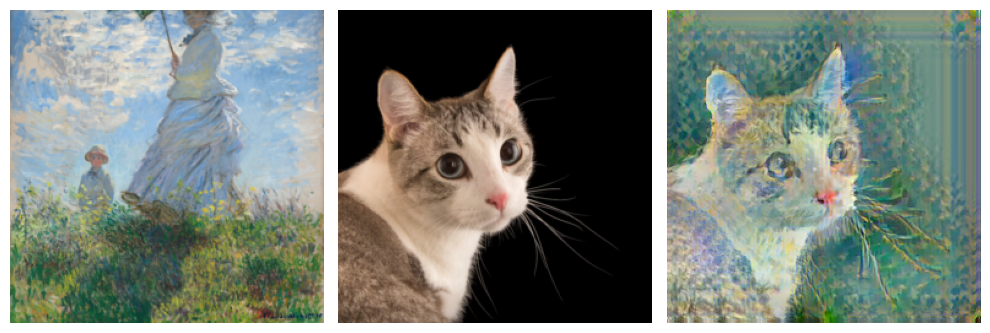

In [16]:
content_t = T.Compose([
    T.Resize(256),
    T.CenterCrop(256),
    T.ToTensor(),
    # normalize using ImageNet mean and std
    # it is necessary since we use pretrained vgg19 model
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]) 

style_t = T.Compose([
    T.Resize(256),
    T.RandomCrop(256),
    T.ToTensor(),
    # normalize using ImageNet mean and std
    # it is necessary since we use pretrained vgg19 model
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]) 
content_img = Image.open('assets/cat.png').convert('RGB')
style_img = Image.open('assets/sui.jpg').convert('RGB')
content_img = content_t(content_img).unsqueeze(0)
style_img = style_t(style_img).unsqueeze(0)
transfered_out = models[-1].transfer(content_img, style_img)
denormed_img = denorm_img(transfered_out)[0].permute(1, 2, 0)
fig = plt.figure(figsize=(10, 30))
plt.subplot(1, 3, 1)
plt.imshow(denorm_img(style_img)[0].permute(1, 2, 0))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(denorm_img(content_img)[0].permute(1, 2, 0))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(torch.clamp(denormed_img, 0, 1))
plt.axis('off')
plt.tight_layout()
plt.show()



## Use Small Patch

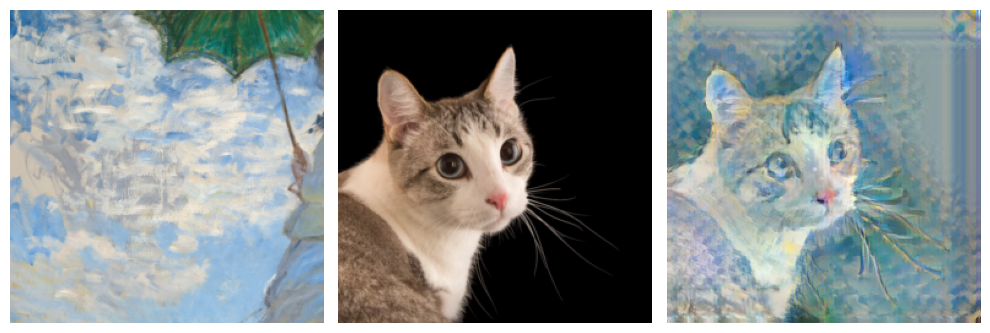

In [17]:
content_t = T.Compose([
    T.Resize(256),
    T.CenterCrop(256),
    T.ToTensor(),
    # normalize using ImageNet mean and std
    # it is necessary since we use pretrained vgg19 model
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]) 

style_t = T.Compose([
    T.Resize(512),
    T.RandomCrop(256),
    T.ToTensor(),
    # normalize using ImageNet mean and std
    # it is necessary since we use pretrained vgg19 model
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
]) 

content_img = Image.open('assets/cat.png').convert('RGB')
style_img = Image.open('assets/sui.jpg').convert('RGB')
content_img = content_t(content_img).unsqueeze(0)
style_img = style_t(style_img).unsqueeze(0)
transfered_out = models[-1].transfer(content_img, style_img)
denormed_img = denorm_img(transfered_out)[0].permute(1, 2, 0)

fig = plt.figure(figsize=(10, 30))
plt.subplot(1, 3, 1)
plt.imshow(denorm_img(style_img)[0].permute(1, 2, 0))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(denorm_img(content_img)[0].permute(1, 2, 0))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(torch.clamp(denormed_img, 0, 1))
plt.axis('off')
plt.tight_layout()
plt.show()

## Model With Different Style weight

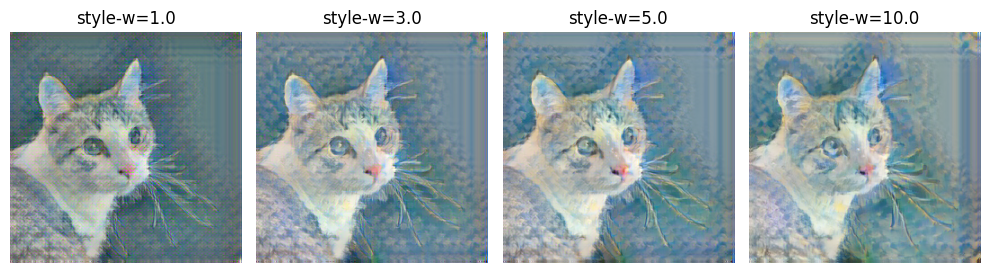

In [18]:
titles = ['style-w=1.0', 'style-w=3.0', 'style-w=5.0', 'style-w=10.0']
plt.figure(figsize=(10, 40))

for idx, model in enumerate(models):
    transfered_out = model.transfer(content_img, style_img)
    denormed_img = denorm_img(transfered_out)[0].permute(1, 2, 0)
    plt.subplot(1, 4, idx + 1)
    plt.imshow(torch.clamp(denormed_img, 0, 1))
    plt.axis('off')
    plt.title(titles[idx])
plt.tight_layout()
plt.show()